In [1]:
# ensure classes imported from .py files are dynamically updated
%load_ext autoreload
%autoreload 2

# plot matplots nicely
%matplotlib inline  

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
import pandas as pd

# load pre-built data classes
from steric_height import StericHeight
from plotting_fns import PlottingFns as pfns
from utils import Utils as utls
from region import Region as rg
from data_handler import *


pfns = pfns()

In [3]:
dot_ds = DOT().ds
lwe_ds = GRACE().ds
msl_ds = ERA5().ds

sha = StericHeight(ssh_ref='DOT',
                   ssh=dot_ds.dot,
                   lwe=lwe_ds.lwe_thickness,
                   msl=msl_ds.msl
                  ).get_sha()

gpha = GPHA()

In [4]:
start_time = pd.Timestamp(2008,1,1)
end_time = pd.Timestamp(2018,1,1)
data = sha.sha.where((sha.time >= start_time) & (sha.time <= end_time))

In [5]:
data_point=data.sel(latitude=-60,longitude=0,method='nearest').dropna(dim='time')

In [6]:
ns_2_yr = lambda x: x * 1e9 * 60 * 60 * 24 * 365.25

In [7]:
ns_2_yr(1)

3.15576e+16

In [8]:
p = data.polyfit(dim='time',deg=1)
m = p.polyfit_coefficients.sel(degree=1)

In [9]:
m_an = ns_2_yr(m)

Text(0, 0.5, 'Latitude')

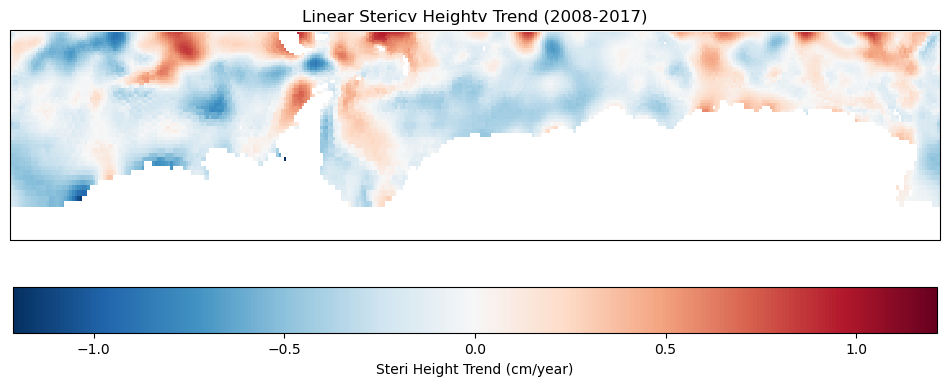

In [10]:
fig,axs = plt.subplots(1,1,figsize=(12,4),subplot_kw={'projection': ccrs.Mercator()})
im = m_an.plot(ax=axs,transform=ccrs.PlateCarree(),x='longitude',y='latitude',add_colorbar=False)
plt.colorbar(im,ax=axs,orientation='horizontal',label='Steri Height Trend (cm/year)')
axs.set_title('Linear Stericv Heightv Trend (2008-2017)')
axs.set_xlabel('Longitude')
axs.set_ylabel('Latitude')

Text(0.0, 1.0, '(b)')

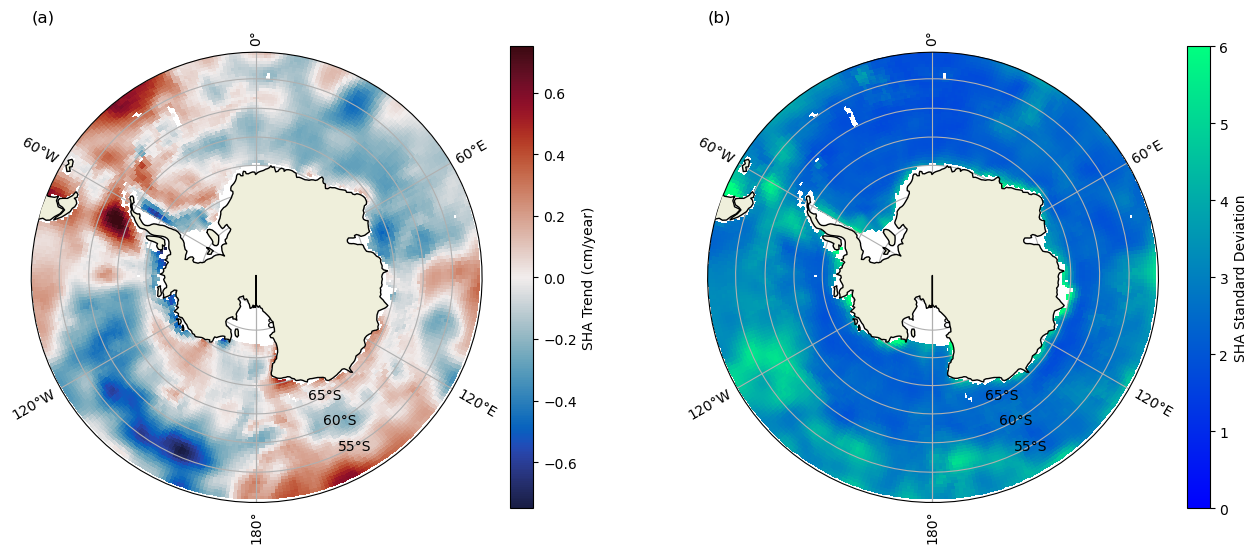

In [11]:
p = sha.sha.polyfit(dim='time',deg=1)
m = p.polyfit_coefficients.sel(degree=1)
sha_std = sha.sha.std('time')

import cmocean
fig,axs = plt.subplots(1,2,figsize=(16,6),subplot_kw={'projection': ccrs.SouthPolarStereo()})

pfns.sp(axs[0],ns_2_yr(m),cmap=cmocean.cm.balance,cbar='SHA Trend (cm/year)',    vmax=0.75,    cbar_orientation='vertical')
pfns.sp(axs[1],sha_std,   cmap='winter',cbar='SHA Standard Deviation', vmin=0,vmax=6,cbar_orientation='vertical')

axs[0].set_title('(a)',loc='left')
axs[1].set_title('(b)',loc='left')


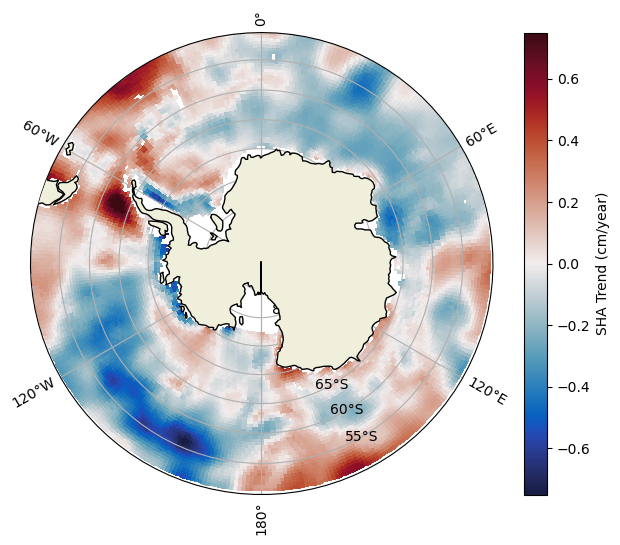

In [12]:

fig,axs = plt.subplots(figsize=(8,6),subplot_kw={'projection': ccrs.SouthPolarStereo()})
pfns.sp(axs,ns_2_yr(m),cmap=cmocean.cm.balance,cbar='SHA Trend (cm/year)',    vmax=0.75,    cbar_orientation='vertical')
